<hr>
<div align="center">
<font size="8">
  <b>Chorus of Prototypes</b> 
</font><br>
This notebook the experiments of the Chorus of Prototypes algorithm on the IRIS dataset. <br>
Paper: <a>https://www.frontiersin.org/articles/10.3389/fncom.2012.00045/full</a>
</div>
<hr>

# __Iris dataset__

In [1]:
import pandas as pd
from sklearn import datasets
import os

iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = ['sepal_length','sepal width','petal_length','petal_width'])
data['species'] = iris.target 
iris = data
# or

# iris = data = pd.read_csv(os.path.abspath("../data/Iris.csv"))

## Data preview

In [2]:
data

,sepal_length,sepal width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

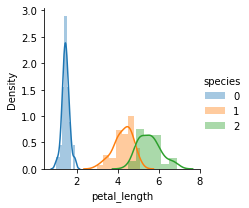

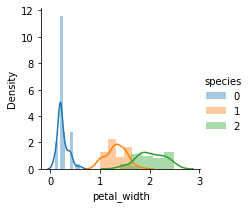

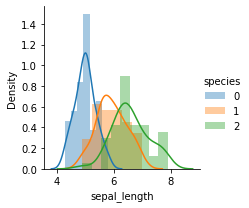

In [4]:
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

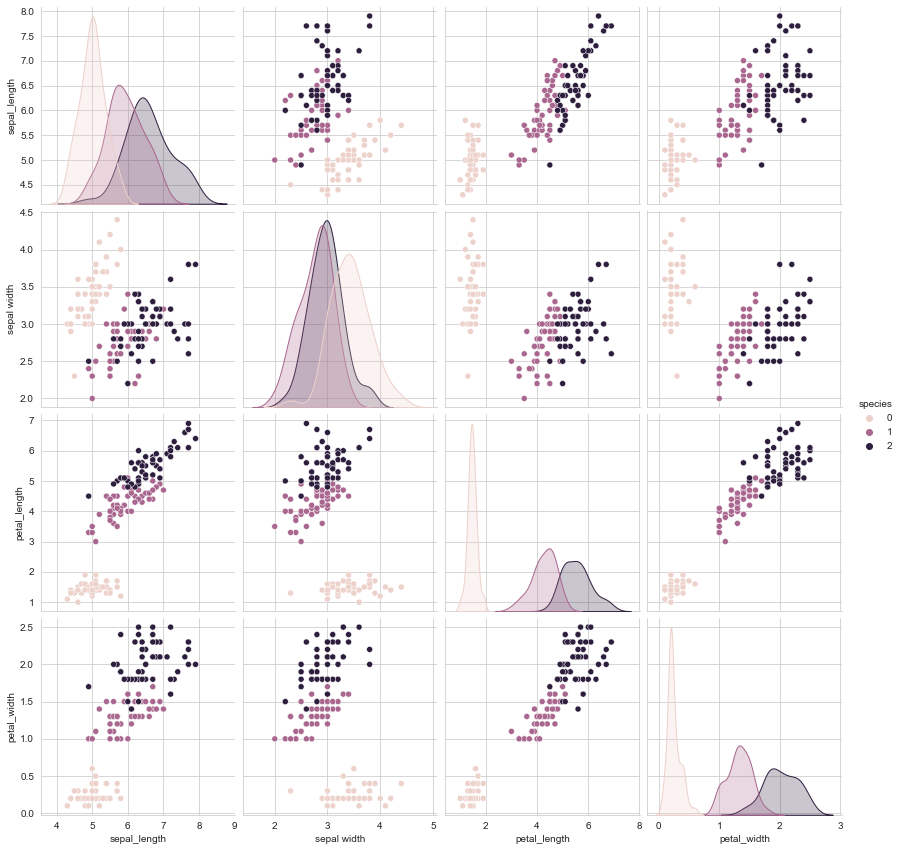

In [5]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

# K-Means on Iris

In [6]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

x = iris.iloc[:, 0:4].values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

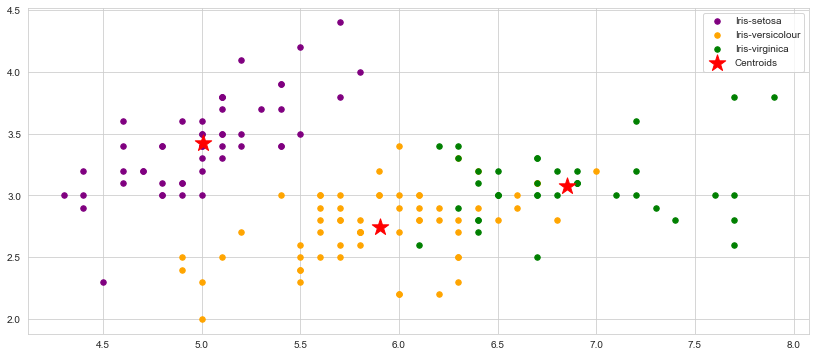

In [7]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
plt.figure(figsize=(14,6))

s = 30
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = s, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = s, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = s, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10*s, c = 'red', label = 'Centroids', marker='*')

plt.legend()

In [8]:
y_kmeans
# np.where(y_kmeans == 1,0,y_kmeans)
# np.where(y_kmeans == 0,1,y_kmeans)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [9]:
data['species'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
p = kmeans.cluster_centers_
p

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
from sklearn.metrics import classification_report

print(classification_report(data['species'], y_kmeans, target_names=['setosa','versicolour','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
 versicolour       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Chorus Transform

In [12]:
import math
from math import sqrt
import numpy as np
from numpy.linalg import norm

def chorus_transform(X, P, n):
    '''
        x: input vectors
        p: prototypes
        n: new dimension / number of prototypes
    '''
    
    d = X.shape[1]
    x_size = X.shape[0]
    print("Initial dimension of x (d): ", d)
    print("Number of vectors", x_size)
    print("Number of prototypes (new dimension):", n) 
          
    n_sqrt = 1/sqrt(n)
    reduced_dimension_vectors = np.empty([X.shape[0], n])
    
    i = 0
    for x in X:
        new_x = np.empty(n)
        p_i = 0
        for p in P:
            new_x[p_i] = norm(x - p)
            p_i += 1
            
        reduced_dimension_vectors[i] = new_x
        i += 1
        
    return reduced_dimension_vectors

In [17]:
reduced_dim_vecs = chorus_transform(x, p,  len(p))

Initial dimension of x (d):  4
Number of vectors 150
Number of prototypes (new dimension): 3


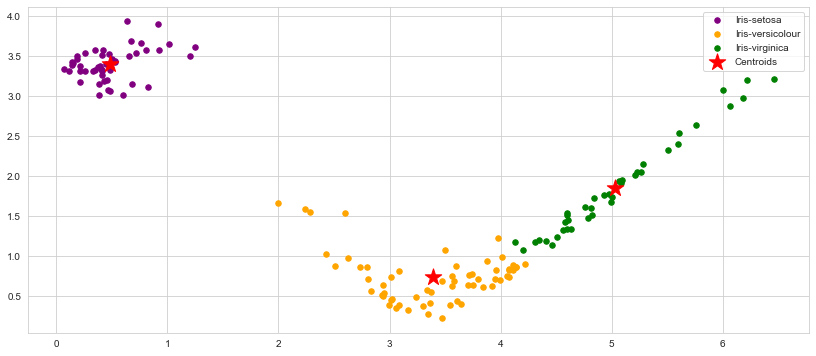

In [14]:
ct_kmeans = KMeans(n_clusters = 3, max_iter = 300,random_state=0)
ct_y_kmeans = ct_kmeans.fit_predict(reduced_dim_vecs)

# Visualising the clusters
plt.figure(figsize=(14,6))

s = 30
plt.scatter(reduced_dim_vecs[ct_y_kmeans == 0, 0], reduced_dim_vecs[ct_y_kmeans == 0, 1], s = s, c = 'purple', label = 'Iris-setosa')
plt.scatter(reduced_dim_vecs[ct_y_kmeans == 1, 0], reduced_dim_vecs[ct_y_kmeans == 1, 1], s = s, c = 'orange', label = 'Iris-versicolour')
plt.scatter(reduced_dim_vecs[ct_y_kmeans == 2, 0], reduced_dim_vecs[ct_y_kmeans == 2, 1], s = s, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(ct_kmeans.cluster_centers_[:, 0], ct_kmeans.cluster_centers_[:,1], s = 10*s, c = 'red', label = 'Centroids', marker='*')

plt.legend()

In [15]:
print(ct_y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [16]:
print(classification_report(data['species'], ct_y_kmeans, target_names=['setosa','versicolour','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
 versicolour       0.79      0.96      0.86        50
   virginica       0.95      0.74      0.83        50

    accuracy                           0.90       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.90      0.90       150



## Comparison of 3- with 4-dimensions

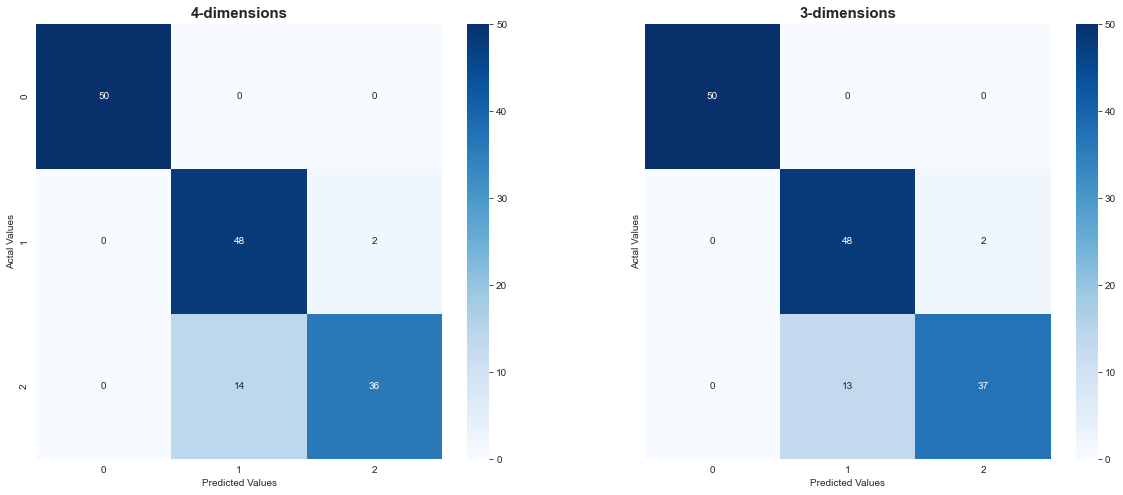

In [36]:
from sklearn.metrics import confusion_matrix
ct_cm_df = pd.DataFrame(confusion_matrix(data['species'], ct_y_kmeans))
cm_df = pd.DataFrame(confusion_matrix(data['species'], y_kmeans))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20,8))

# plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True, cmap="Blues", ax=ax1)
ax1.set_title("4-dimensions", fontsize=15, fontweight='bold')
ax1.set_ylabel('Actal Values')
ax1.set_xlabel('Predicted Values')

sns.heatmap(ct_cm_df, annot=True, cmap="Blues", ax=ax2)
ax2.set_title("3-dimensions", fontsize=15, fontweight='bold')
ax2.set_ylabel('Actal Values')
ax2.set_xlabel('Predicted Values')
plt.show()
